## Importing Necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

## Reading in Data

In [2]:
data = pd.read_csv('IRIS.csv')

In [3]:
df = data.copy()

## Data Exploration & Preprocessing

In [4]:
df.shape

(150, 5)

*The dataset has 150 records and 5 features.*

In [5]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


*Since the data is of iris flowers, it is redundant to have values like 'Iris-setosa', 'Iris-viginica' and 'Iris - versicolor' in the species, hence, modifying as desired.*

In [6]:
df['species'] = df['species'].apply(lambda x : x[5:])

In [7]:
df.sample()

,sepal_length,sepal_width,petal_length,petal_width,species
23,5.1,3.3,1.7,0.5,setosa


In [8]:
df.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

*The data does not have null values.*

*Checking and removing duplicate records*

In [9]:
df.duplicated().sum()

3

In [10]:
df.drop_duplicates(inplace = True)

*Finally, we have the following features to work with:*

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 147 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  147 non-null    float64
 1   sepal_width   147 non-null    float64
 2   petal_length  147 non-null    float64
 3   petal_width   147 non-null    float64
 4   species       147 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.9+ KB


*Grouping numerical columns together for further analysis*

<Axes: xlabel='species', ylabel='count'>

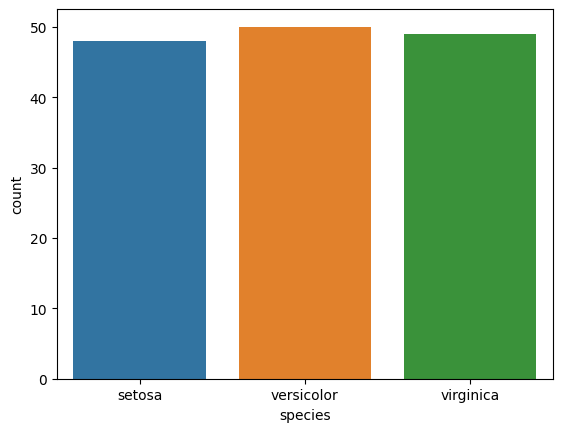

In [12]:
sns.countplot(x = 'species', data = df)

*The flowers are approximately equally distributed among the three species. Hence, the dataset is balanced.*

In [13]:
num_cols = [col for col in df.columns if df[col].dtype == 'int64' or df[col].dtype == 'float64']

In [14]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,147.000000,147.000000,147.000000,147.000000
mean,5.856463,3.055782,3.780272,1.208844
std,0.829100,0.437009,1.759111,0.757874
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


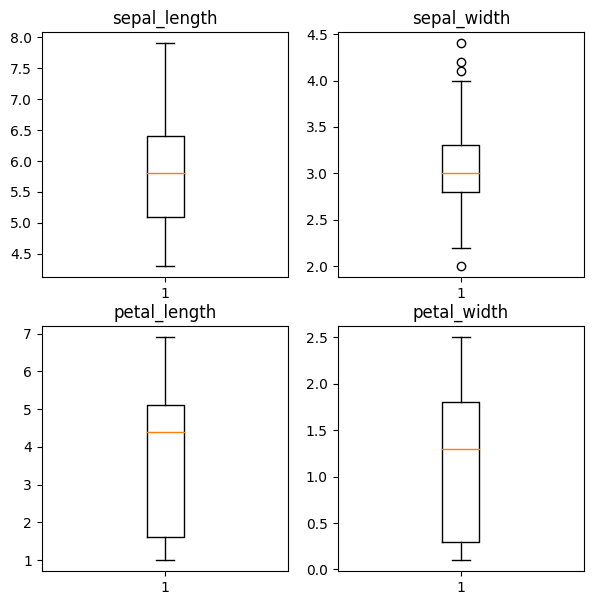

In [15]:
plt.figure(figsize = (7, 7))
for index, col in enumerate(num_cols):
        ax = plt.subplot(2, 2, index + 1)
        ax.boxplot(x = df[col])
        ax.set_title(col)

*We notice that sepal width has a few outliers. For the rest numerical variables, the distribution seems to be more or less normal.*

In [16]:
q1 = np.quantile(df['sepal_width'], 0.25)
q3 = np.quantile(df['sepal_width'], 0.75)
l_thresh = q1 - 1.5*(q3 - q1)
h_thresh = q3 + 1.5*(q3 - q1)
df.loc[(df['sepal_width'] < l_thresh) | (df['sepal_width'] > h_thresh)]

,sepal_length,sepal_width,petal_length,petal_width,species
15,5.7,4.4,1.5,0.4,setosa
32,5.2,4.1,1.5,0.1,setosa
33,5.5,4.2,1.4,0.2,setosa
60,5.0,2.0,3.5,1.0,versicolor


*Interestingly, the higher outlier records, all belong to setosa.*

In [17]:
# Segregating data records by species
setosa_df = df[df['species'] == 'setosa']
versicolor_df = df[df['species'] == 'versicolor']
virginica_df = df[df['species'] == 'virginica']

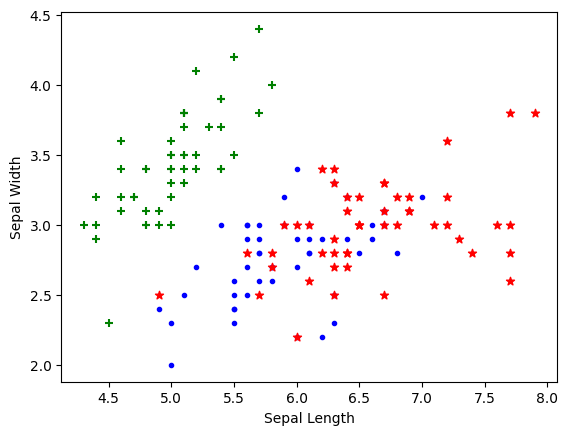

In [18]:
# Plotting category wise sepal length and width to get a visual understanding of the clusters
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.scatter(setosa_df['sepal_length'], setosa_df['sepal_width'], color = "green", marker = '+')
plt.scatter(versicolor_df['sepal_length'], versicolor_df['sepal_width'], color = "blue", marker = '.')
plt.scatter(virginica_df['sepal_length'], virginica_df['sepal_width'], color = "red", marker = '*')

## Modelling

In [19]:
X = df.drop(['species'], axis = 1)
y = df['species']

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 200)

In [21]:
scale = StandardScaler()
X_train = scale.fit_transform(X_train)
X_test = scale.fit_transform(X_test)

In [22]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [23]:
model.score(X_test, y_test)

0.9666666666666667